In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
#from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from random import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
pd.options.display.float_format = "{:,.2f}".format

In [7]:
#!pip install pmdarima

In [8]:
#data = pd.read_csv('../dataset/NFA.Canada.csv')
data = pd.read_excel('../../dataset/NFA.ECOTS.xlsx')

In [9]:
data.columns

Index(['country', 'year', 'record_x', 'TOT_EF', 'Continent', 'record_y', 'TOT_Biocapacity', 'Biocapacity_Res_Def', 'Biocapacity'], dtype='object')

In [10]:
data

,country,year,record_x,TOT_EF,Continent,record_y,TOT_Biocapacity,Biocapacity_Res_Def,Biocapacity
0,Armenia,1992,EFConsTotGHA,"5,951,341.87",Asia,BiocapTotGHA,"1,467,355.15","-4,483,986.72",0
1,Armenia,1993,EFConsTotGHA,"3,880,463.39",Asia,BiocapTotGHA,"1,441,053.16","-2,439,410.23",0
2,Armenia,1994,EFConsTotGHA,"3,638,784.05",Asia,BiocapTotGHA,"1,439,578.06","-2,199,205.99",0
3,Armenia,1995,EFConsTotGHA,"3,291,102.03",Asia,BiocapTotGHA,"1,466,386.40","-1,824,715.63",0
4,Armenia,1996,EFConsTotGHA,"3,271,945.92",Asia,BiocapTotGHA,"1,591,106.80","-1,680,839.12",0
...,...,...,...,...,...,...,...,...,...
8962,China,2012,EFConsTotGHA,"5,095,269,713.00",Asia,BiocapTotGHA,"1,342,724,556.00","-3,752,545,157.00",0
8963,China,2013,EFConsTotGHA,"5,259,999,080.00",Asia,BiocapTotGHA,"1,348,376,097.00","-3,911,622,983.00",0
8964,China,2014,EFConsTotGHA,"5,240,815,731.00",Asia,BiocapTotGHA,"1,356,252,273.00","-3,884,563,458.00",0
8965,China,2015,EFConsTotGHA,"5,228,458,472.00",Asia,BiocapTotGHA,"1,364,405,931.00","-3,864,052,541.00",0


In [12]:
data_Lb = data[data.country == 'Lebanon']
data_Lb

,country,year,record_x,TOT_EF,Continent,record_y,TOT_Biocapacity,Biocapacity_Res_Def,Biocapacity
4469,Lebanon,1961,EFConsTotGHA,"3,135,049.18",Asia,BiocapTotGHA,"860,498.27","-2,274,550.91",0
4470,Lebanon,1962,EFConsTotGHA,"3,211,758.47",Asia,BiocapTotGHA,"873,161.62","-2,338,596.85",0
4471,Lebanon,1963,EFConsTotGHA,"3,911,477.40",Asia,BiocapTotGHA,"873,915.78","-3,037,561.62",0
4472,Lebanon,1964,EFConsTotGHA,"3,648,862.59",Asia,BiocapTotGHA,"891,724.95","-2,757,137.64",0
4473,Lebanon,1965,EFConsTotGHA,"3,834,500.92",Asia,BiocapTotGHA,"881,291.37","-2,953,209.55",0
4474,Lebanon,1966,EFConsTotGHA,"3,954,015.50",Asia,BiocapTotGHA,"878,551.68","-3,075,463.81",0
4475,Lebanon,1967,EFConsTotGHA,"4,109,166.39",Asia,BiocapTotGHA,"929,384.45","-3,179,781.95",0
4476,Lebanon,1968,EFConsTotGHA,"4,584,756.51",Asia,BiocapTotGHA,"857,878.51","-3,726,877.99",0
4477,Lebanon,1969,EFConsTotGHA,"4,669,550.61",Asia,BiocapTotGHA,"816,853.11","-3,852,697.50",0
4478,Lebanon,1970,EFConsTotGHA,"4,658,241.05",Asia,BiocapTotGHA,"870,217.23","-3,788,023.81",0


# BIOCAPACITY 

In [13]:
data_Lb_biocap = data_Lb.drop(['country', 'record_x', 'TOT_EF', 'Continent', 'record_y', 'Biocapacity_Res_Def','Biocapacity'], axis=1)
data_Lb_biocap.head()

,year,TOT_Biocapacity
4469,1961,"860,498.27"
4470,1962,"873,161.62"
4471,1963,"873,915.78"
4472,1964,"891,724.95"
4473,1965,"881,291.37"


In [14]:
print('Time period start: {}\nTime period end: {}'.format(data_Lb_biocap.year.min(),data_Lb_biocap.year.max()))

Time period start: 1961
Time period end: 2016


In [16]:
data_Lb_biocap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 4469 to 4524
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             56 non-null     int64  
 1   TOT_Biocapacity  56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


In [17]:
data_Lb_biocap['year'] = pd.to_datetime(data_Lb_biocap['year'], format='%Y')
data_Lb_biocap.year

4469   1961-01-01
4470   1962-01-01
4471   1963-01-01
4472   1964-01-01
4473   1965-01-01
4474   1966-01-01
4475   1967-01-01
4476   1968-01-01
4477   1969-01-01
4478   1970-01-01
4479   1971-01-01
4480   1972-01-01
4481   1973-01-01
4482   1974-01-01
4483   1975-01-01
4484   1976-01-01
4485   1977-01-01
4486   1978-01-01
4487   1979-01-01
4488   1980-01-01
4489   1981-01-01
4490   1982-01-01
4491   1983-01-01
4492   1984-01-01
4493   1985-01-01
4494   1986-01-01
4495   1987-01-01
4496   1988-01-01
4497   1989-01-01
4498   1990-01-01
4499   1991-01-01
4500   1992-01-01
4501   1993-01-01
4502   1994-01-01
4503   1995-01-01
4504   1996-01-01
4505   1997-01-01
4506   1998-01-01
4507   1999-01-01
4508   2000-01-01
4509   2001-01-01
4510   2002-01-01
4511   2003-01-01
4512   2004-01-01
4513   2005-01-01
4514   2006-01-01
4515   2007-01-01
4516   2008-01-01
4517   2009-01-01
4518   2010-01-01
4519   2011-01-01
4520   2012-01-01
4521   2013-01-01
4522   2014-01-01
4523   2015-01-01
4524   201

**Setting index as the datetime column for easier manipulations:**

In [18]:
y = data_Lb_biocap.set_index('year')
y

,TOT_Biocapacity
year,
1961-01-01,"860,498.27"
1962-01-01,"873,161.62"
1963-01-01,"873,915.78"
1964-01-01,"891,724.95"
1965-01-01,"881,291.37"
1966-01-01,"878,551.68"
1967-01-01,"929,384.45"
1968-01-01,"857,878.51"
1969-01-01,"816,853.11"


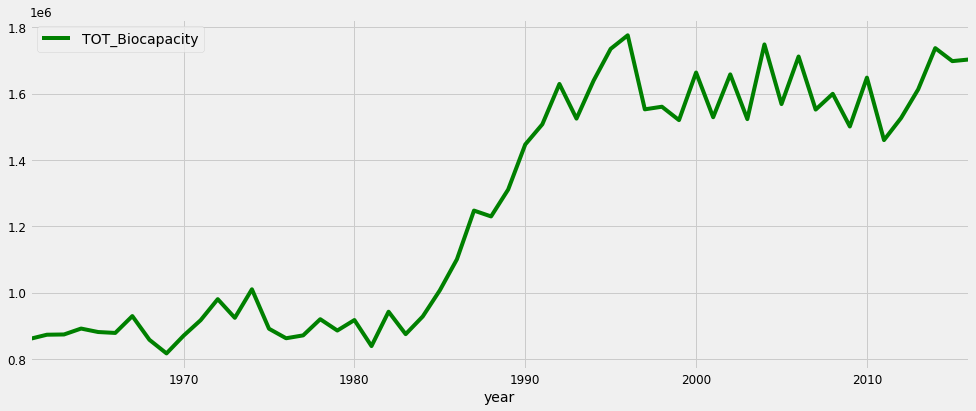

In [19]:
y.plot(figsize=(15, 6), color='green')
plt.show()

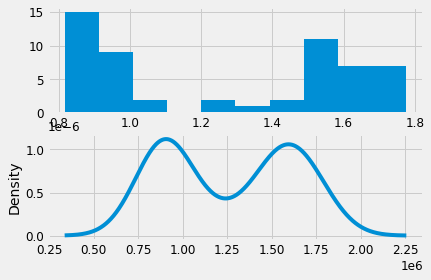

In [20]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.TOT_Biocapacity.hist()
pyplot.subplot(212)
y.TOT_Biocapacity.plot(kind='kde')
pyplot.show()

__Reviewing plots of the density of observations can provide further insight into the structure of the data:__
- The distribution is not perfectly Gaussian (normal distribution).
- The distribution is left shifted.
- Transformations might be useful prior to modelling.

# Decomposition of the time series data

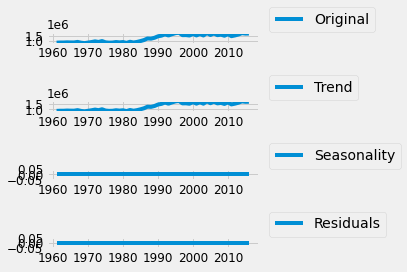

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc=(1.05, 1))

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc=(1.05, 1))

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc=(1.05, 1))

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc=(1.05, 1))
plt.tight_layout()

# Stationarity


- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

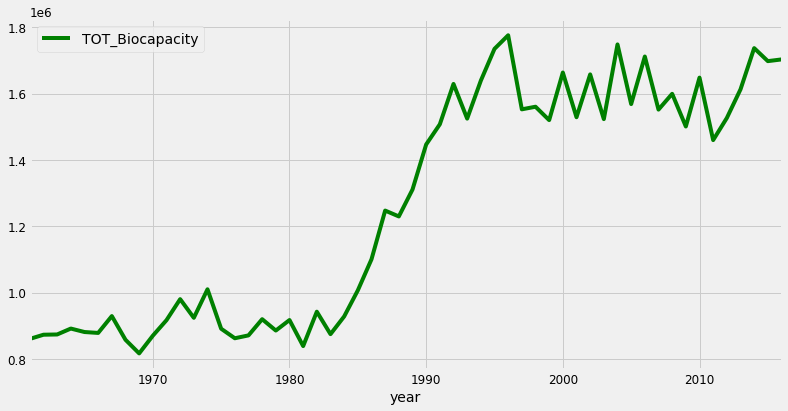

In [22]:
y.plot(figsize=(12, 6), color='green')
plt.show()

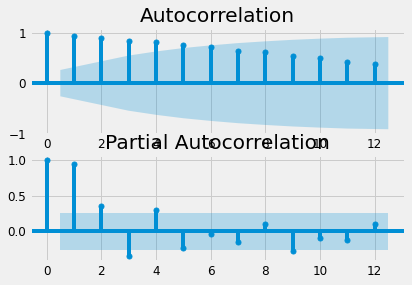

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(y.TOT_Biocapacity, ax=pyplot.gca(), lags = 12)
pyplot.subplot(212)
plot_pacf(y.TOT_Biocapacity, ax=pyplot.gca(), lags = 12)
pyplot.show()

## Plotting Rolling Statistics
The most basic approach for understanding this is to plot the data and check if there’s any hint at the presence of underlying trends or seasonality. This visual practice rarely helps and often its difficult for the human eye to tell this. So we can add rolling statistics (like moving average, rolling std etc) to the data with a fixed window size to check for stationarity

In [24]:
y

,TOT_Biocapacity
year,
1961-01-01,"860,498.27"
1962-01-01,"873,161.62"
1963-01-01,"873,915.78"
1964-01-01,"891,724.95"
1965-01-01,"881,291.37"
1966-01-01,"878,551.68"
1967-01-01,"929,384.45"
1968-01-01,"857,878.51"
1969-01-01,"816,853.11"


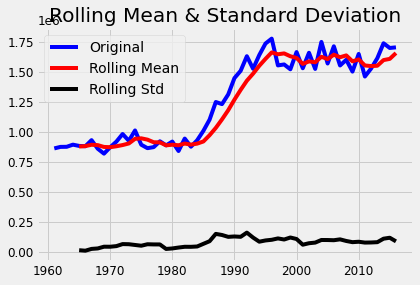

In [25]:
#Determing rolling statistics
rolmean = y.rolling(5).mean()
rolstd = y.rolling(5).std()

#Plot rolling statistics:
orig = plt.plot(y, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- We observe that the rolling mean and Standard deviation are not constant with respect to time (decreasing trend)
- The time series is hence not stationary

##  Augmented Dickey-Fuller Test

The `Augmented Dickey Fuller Test (ADF)` is unit root test for stationarity. Unit roots can cause unpredictable results in your time series analysis.

The Augmented Dickey-Fuller test can be used with serial correlation. Steps to follow:

- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate stationarity

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(y)
dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic','p-value',
                            '#Lags Used','Number of Observations Used'])
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -0.82
p-value                        0.81
#Lags Used                     4.00
Number of Observations Used   51.00
dtype: float64


# Time Series modelling 
## Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

`Autoregressive` models are based on the idea that current value of the series, Xt, can be explained as a linear combination of n past values

Xt−1, Xt−2, . . . , Xt−p, 

together with a random error in the same series


- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [28]:
from statsmodels.tsa.ar_model import AR
from random import random

In [29]:
# fit model
model = AR(y)
model_fit = model.fit()

c:\users\fruto\anaconda3\envs\dataanalytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [30]:
model_fit.fittedvalues

year
1971-01-01     909,851.22
1972-01-01     945,474.20
1973-01-01     965,581.11
1974-01-01     981,693.93
1975-01-01   1,046,300.83
1976-01-01   1,001,026.08
1977-01-01     844,076.48
1978-01-01     921,530.75
1979-01-01     919,421.00
1980-01-01     904,096.58
1981-01-01     919,041.56
1982-01-01     949,540.77
1983-01-01     926,741.35
1984-01-01     954,989.40
1985-01-01     895,665.01
1986-01-01   1,065,588.86
1987-01-01   1,111,978.45
1988-01-01   1,256,013.41
1989-01-01   1,290,263.93
1990-01-01   1,346,583.52
1991-01-01   1,494,020.87
1992-01-01   1,523,327.57
1993-01-01   1,595,096.31
1994-01-01   1,608,127.82
1995-01-01   1,626,198.25
1996-01-01   1,774,557.61
1997-01-01   1,731,566.15
1998-01-01   1,597,011.11
1999-01-01   1,557,410.99
2000-01-01   1,615,842.53
2001-01-01   1,524,312.31
2002-01-01   1,547,827.81
2003-01-01   1,593,877.69
2004-01-01   1,686,401.42
2005-01-01   1,633,792.21
2006-01-01   1,696,948.25
2007-01-01   1,582,331.35
2008-01-01   1,717,516.82
2009-01

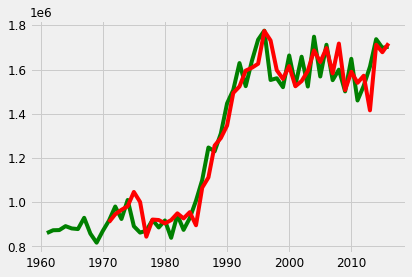

In [31]:
plt.plot(y, color='green')
plt.plot(model_fit.fittedvalues, color='red')
plt.show()

### Forecast over a period of time

In [32]:
from datetime import datetime
forecast_ar1 = model_fit.predict(start=datetime(2016, 1, 1), end=datetime(2040,12,31))

In [33]:
forecast_ar1

2016-01-01   1,718,349.73
2017-01-01   1,708,860.52
2018-01-01   1,813,385.22
2019-01-01   1,769,093.60
2020-01-01   1,773,975.23
2021-01-01   1,735,193.96
2022-01-01   1,798,435.57
2023-01-01   1,775,542.19
2024-01-01   1,782,702.58
2025-01-01   1,741,976.92
2026-01-01   1,783,315.59
2027-01-01   1,769,356.16
2028-01-01   1,788,540.74
2029-01-01   1,753,611.25
2030-01-01   1,782,438.15
2031-01-01   1,771,277.08
2032-01-01   1,794,251.55
2033-01-01   1,767,947.93
2034-01-01   1,788,010.29
2035-01-01   1,776,399.31
2036-01-01   1,798,474.09
2037-01-01   1,778,862.76
2038-01-01   1,794,151.47
2039-01-01   1,781,855.12
2040-01-01   1,800,931.16
2041-01-01   1,786,370.07
Freq: AS-JAN, dtype: float64

### Visualizing results Biocapacity

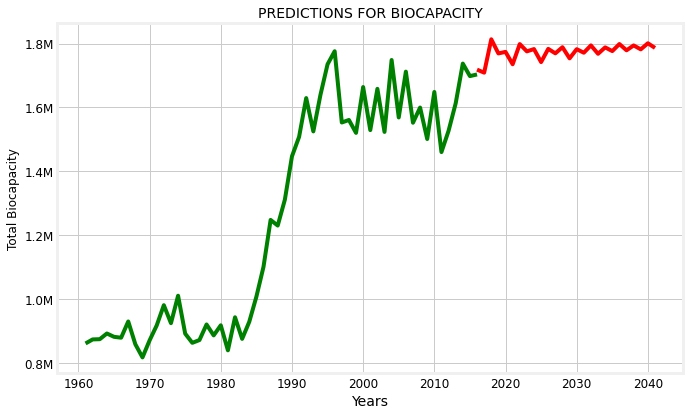

In [34]:
plt.figure(figsize=(10,6), facecolor='white')
ax=plt.axes()
ax.set_facecolor('white')
plt.plot(y, color='green')
ax.set_facecolor('white')
plt.plot(forecast_ar1, color='red')
plt.xlabel("Years")
plt.ylabel("Total Biocapacity", fontsize= 12)
plt.title("PREDICTIONS FOR BIOCAPACITY", fontsize= 14)
ax.yaxis.set_major_formatter(formatter)
plt.show()

## ARIMA

    No acaba de ajustarse muy bien este modelo

In [35]:
y

,TOT_Biocapacity
year,
1961-01-01,"860,498.27"
1962-01-01,"873,161.62"
1963-01-01,"873,915.78"
1964-01-01,"891,724.95"
1965-01-01,"881,291.37"
1966-01-01,"878,551.68"
1967-01-01,"929,384.45"
1968-01-01,"857,878.51"
1969-01-01,"816,853.11"


In [36]:
#divide into train and validation set
train = y[:-4]
valid = y[-4:]

#plotting the data
#train.plot()
valid

,TOT_Biocapacity
year,
2013-01-01,"1,612,907.49"
2014-01-01,"1,737,266.42"
2015-01-01,"1,698,068.50"
2016-01-01,"1,703,195.61"


In [37]:
#building the model
from pmdarima import auto_arima
model_arima = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True)
model_arima.fit(y)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1418.322, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1424.312, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1420.861, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1421.818, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1423.649, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1416.426, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1422.868, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1414.921, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1416.691, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1420.920, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1414.669, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1422.464, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1421.586, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1416.264, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [38]:
forecast_ari = model_arima.predict(start=datetime(2016, 1, 1), 
                                   end=datetime(2040,12,31))
forecast_ari = pd.DataFrame(forecast_ar1,columns=['Prediction'], 
                            index = forecast_ar1.index[:20])
forecast_ari

,Prediction
2016-01-01,"1,718,349.73"
2017-01-01,"1,708,860.52"
2018-01-01,"1,813,385.22"
2019-01-01,"1,769,093.60"
2020-01-01,"1,773,975.23"
2021-01-01,"1,735,193.96"
2022-01-01,"1,798,435.57"
2023-01-01,"1,775,542.19"
2024-01-01,"1,782,702.58"
2025-01-01,"1,741,976.92"


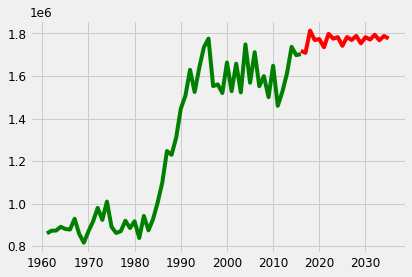

In [39]:
#plot the predictions for validation set
plt.plot(y, label='Valid', color='green')
plt.plot(forecast_ari, label='Prediction', color='red')
plt.show()

In [40]:
###########################################################################
############ FIN Idoia ####################################################

# ECOLOGICAL FOOTPRINT OF CONSUMPTIOM

In [42]:
data_Lb_EF = data_Lb.drop(['country', 'record_x', 'TOT_Biocapacity', 'Continent', 'record_y', 'Biocapacity_Res_Def','Biocapacity'], axis=1)
data_Lb_EF.head()

,year,TOT_EF
4469,1961,"3,135,049.18"
4470,1962,"3,211,758.47"
4471,1963,"3,911,477.40"
4472,1964,"3,648,862.59"
4473,1965,"3,834,500.92"


In [43]:
data_Lb_EF['year'] = pd.to_datetime(data_Lb_EF['year'], format='%Y')
data_Lb_EF.year

4469   1961-01-01
4470   1962-01-01
4471   1963-01-01
4472   1964-01-01
4473   1965-01-01
4474   1966-01-01
4475   1967-01-01
4476   1968-01-01
4477   1969-01-01
4478   1970-01-01
4479   1971-01-01
4480   1972-01-01
4481   1973-01-01
4482   1974-01-01
4483   1975-01-01
4484   1976-01-01
4485   1977-01-01
4486   1978-01-01
4487   1979-01-01
4488   1980-01-01
4489   1981-01-01
4490   1982-01-01
4491   1983-01-01
4492   1984-01-01
4493   1985-01-01
4494   1986-01-01
4495   1987-01-01
4496   1988-01-01
4497   1989-01-01
4498   1990-01-01
4499   1991-01-01
4500   1992-01-01
4501   1993-01-01
4502   1994-01-01
4503   1995-01-01
4504   1996-01-01
4505   1997-01-01
4506   1998-01-01
4507   1999-01-01
4508   2000-01-01
4509   2001-01-01
4510   2002-01-01
4511   2003-01-01
4512   2004-01-01
4513   2005-01-01
4514   2006-01-01
4515   2007-01-01
4516   2008-01-01
4517   2009-01-01
4518   2010-01-01
4519   2011-01-01
4520   2012-01-01
4521   2013-01-01
4522   2014-01-01
4523   2015-01-01
4524   201

In [44]:
x = data_Lb_EF.set_index('year')
x

,TOT_EF
year,
1961-01-01,"3,135,049.18"
1962-01-01,"3,211,758.47"
1963-01-01,"3,911,477.40"
1964-01-01,"3,648,862.59"
1965-01-01,"3,834,500.92"
1966-01-01,"3,954,015.50"
1967-01-01,"4,109,166.39"
1968-01-01,"4,584,756.51"
1969-01-01,"4,669,550.61"


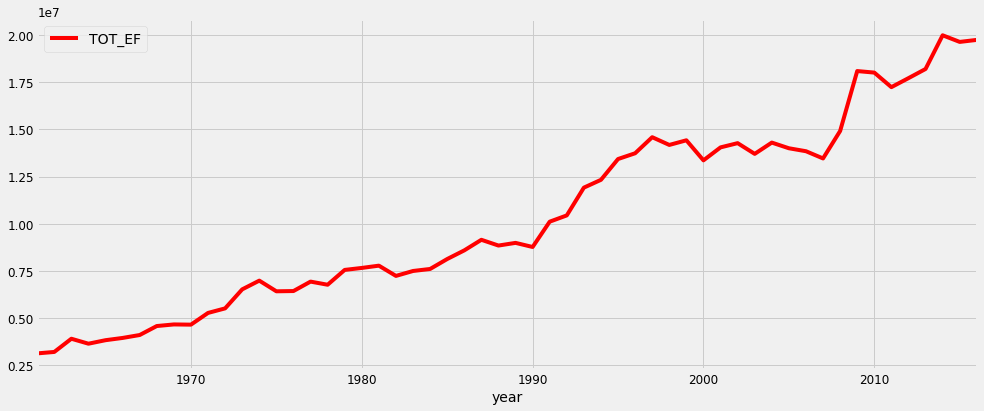

In [45]:
x.plot(figsize=(15, 6), color='red')
plt.show()

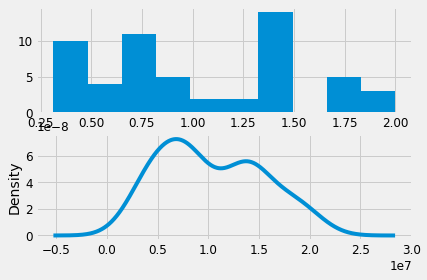

In [46]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
x.TOT_EF.hist()
pyplot.subplot(212)
x.TOT_EF.plot(kind='kde')
pyplot.show()

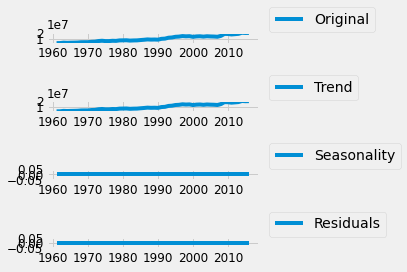

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc=(1.05, 1))

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc=(1.05, 1))

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc=(1.05, 1))

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc=(1.05, 1))
plt.tight_layout()

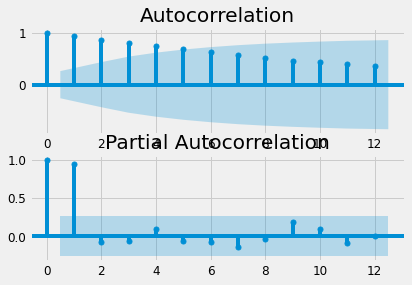

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

pyplot.figure()
pyplot.subplot(211)
plot_acf(x.TOT_EF, ax=pyplot.gca(), lags = 12)
pyplot.subplot(212)
plot_pacf(x.TOT_EF, ax=pyplot.gca(), lags = 12)
pyplot.show()

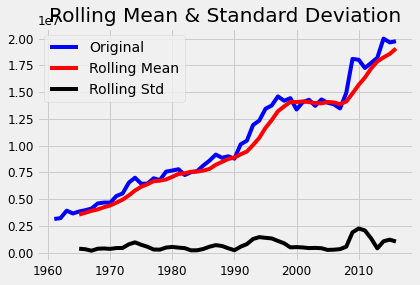

In [49]:
#Determing rolling statistics
rolmean = x.rolling(5).mean()
rolstd = x.rolling(5).std()

#Plot rolling statistics:
orig = plt.plot(x, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [50]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(x)
dfoutput = pd.Series(dftest[0:4], 
                     index=['Test Statistic','p-value',
                            '#Lags Used','Number of Observations Used'])
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 0.44
p-value                        0.98
#Lags Used                     9.00
Number of Observations Used   46.00
dtype: float64


In [51]:
# fit model
model = AR(x)
model_fitx = model.fit()

c:\users\fruto\anaconda3\envs\dataanalytics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [52]:
model_fitx.fittedvalues

year
1971-01-01    5,076,045.03
1972-01-01    5,314,499.19
1973-01-01    6,251,246.11
1974-01-01    6,734,518.31
1975-01-01    7,256,270.07
1976-01-01    6,623,088.98
1977-01-01    6,533,380.85
1978-01-01    7,657,018.82
1979-01-01    7,185,416.14
1980-01-01    7,406,083.56
1981-01-01    8,164,192.54
1982-01-01    7,565,907.89
1983-01-01    7,294,764.72
1984-01-01    8,656,338.90
1985-01-01    8,241,925.45
1986-01-01    8,253,011.96
1987-01-01    9,211,331.06
1988-01-01    9,153,240.87
1989-01-01    9,196,836.36
1990-01-01    9,401,969.59
1991-01-01    9,803,771.69
1992-01-01   10,546,122.13
1993-01-01   10,752,903.01
1994-01-01   11,880,102.70
1995-01-01   12,365,824.75
1996-01-01   13,417,938.96
1997-01-01   14,158,303.20
1998-01-01   14,800,407.65
1999-01-01   14,582,490.21
2000-01-01   13,873,507.98
2001-01-01   13,690,052.87
2002-01-01   13,733,596.75
2003-01-01   14,708,596.96
2004-01-01   13,417,408.20
2005-01-01   14,738,294.92
2006-01-01   14,385,876.91
2007-01-01   14,728,371

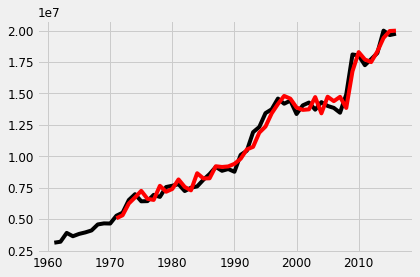

In [53]:
plt.plot(x, color='black')
plt.plot(model_fitx.fittedvalues, color='red')
plt.show()

In [54]:
from datetime import datetime
forecast_ar = model_fitx.predict(start=datetime(2016, 1, 1), end=datetime(2040,12,31))

In [55]:
forecast_ar1

2016-01-01   1,718,349.73
2017-01-01   1,708,860.52
2018-01-01   1,813,385.22
2019-01-01   1,769,093.60
2020-01-01   1,773,975.23
2021-01-01   1,735,193.96
2022-01-01   1,798,435.57
2023-01-01   1,775,542.19
2024-01-01   1,782,702.58
2025-01-01   1,741,976.92
2026-01-01   1,783,315.59
2027-01-01   1,769,356.16
2028-01-01   1,788,540.74
2029-01-01   1,753,611.25
2030-01-01   1,782,438.15
2031-01-01   1,771,277.08
2032-01-01   1,794,251.55
2033-01-01   1,767,947.93
2034-01-01   1,788,010.29
2035-01-01   1,776,399.31
2036-01-01   1,798,474.09
2037-01-01   1,778,862.76
2038-01-01   1,794,151.47
2039-01-01   1,781,855.12
2040-01-01   1,800,931.16
2041-01-01   1,786,370.07
Freq: AS-JAN, dtype: float64

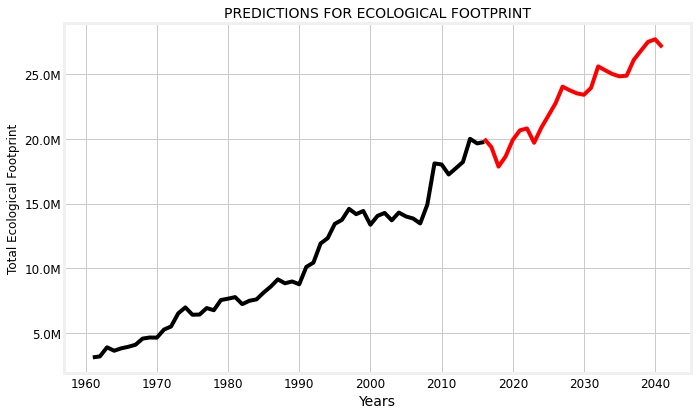

No handles with labels found to put in legend.


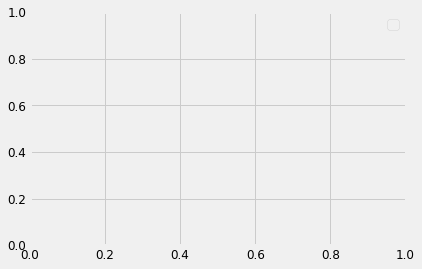

In [56]:
plt.figure(figsize=(10,6), facecolor='white')
ax=plt.axes()
ax.set_facecolor('white')
plt.plot(x, color='black', label="Ecological Footprint")
ax.set_facecolor('white')
plt.plot(forecast_ar, color='red', label="Predictions")
plt.xlabel("Years")
plt.ylabel("Total Ecological Footprint", fontsize= 12)
plt.title("PREDICTIONS FOR ECOLOGICAL FOOTPRINT", fontsize= 14)
ax.yaxis.set_major_formatter(formatter)
plt.show()
plt.legend()

In [57]:
forecast_ar

2016-01-01   19,988,296.00
2017-01-01   19,353,278.92
2018-01-01   17,848,990.57
2019-01-01   18,637,461.28
2020-01-01   19,905,015.87
2021-01-01   20,645,434.65
2022-01-01   20,793,119.07
2023-01-01   19,689,111.42
2024-01-01   20,838,783.04
2025-01-01   21,778,019.08
2026-01-01   22,721,121.15
2027-01-01   24,016,498.35
2028-01-01   23,734,139.44
2029-01-01   23,498,585.29
2030-01-01   23,389,146.06
2031-01-01   23,922,746.02
2032-01-01   25,577,537.13
2033-01-01   25,273,016.49
2034-01-01   24,987,801.15
2035-01-01   24,807,624.90
2036-01-01   24,861,053.23
2037-01-01   26,079,569.44
2038-01-01   26,782,618.30
2039-01-01   27,466,879.47
2040-01-01   27,668,284.16
2041-01-01   27,058,133.44
Freq: AS-JAN, dtype: float64

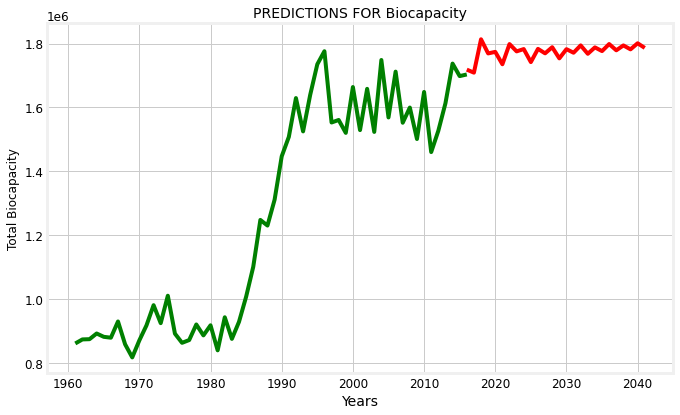

In [58]:
plt.figure(figsize=(10,6), facecolor='white')
ax=plt.axes()
ax.set_facecolor('white')
plt.plot(y, color='green')
ax.set_facecolor('white')
plt.plot(forecast_ar1, color='red')
plt.xlabel("Years")
plt.ylabel("Total Biocapacity", fontsize= 12)
plt.title("PREDICTIONS FOR Biocapacity", fontsize= 14)
plt.show()

In [ ]:
r2_score(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
mean_absolute_error(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
median_absolute_error(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
mean_squared_error(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
mean_squared_log_error(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['mape'] = mean_absolute_percentage_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [ ]:
evaluate_forecast(y.Biocapacity_Res_Def, predictions_AR)

In [ ]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(0, 1))
model_fit = model.fit(disp=False)

In [ ]:
model_fit.summary()

In [ ]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

In [ ]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(ts_log_diff, order=(2, 1))
model_fit = model.fit(disp=False)

In [ ]:
model_fit.summary()

In [ ]:
plt.plot(ts_log_diff)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-ts_log_diff)**2))

In [ ]:
ts = y.Biocapacity_Res_Def - y.Biocapacity_Res_Def.shift()
ts.dropna(inplace=True)

In [ ]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts, ax=pyplot.gca(),lags=13)
pyplot.subplot(212)
plot_pacf(ts, ax=pyplot.gca(),lags=13)
pyplot.show()

In [ ]:
#divide into train and validation set
train = y[:int(0.75*(len(y)))]
valid = y[int(0.75*(len(y))):]

#plotting the data
train['Biocapacity_Res_Def'].plot()
valid['Biocapacity_Res_Def'].plot()

In [ ]:
model = ARIMA(train, order=(1,0,0))
results_ARIMA = model.fit(disp=1)

In [ ]:
model_fit.summary()

In [ ]:
valid

In [ ]:
start_index = valid.index.min()

end_index = valid.index.max()
start_index

In [ ]:
#Predictions
predictions = model_fit.predict(start=valid.index.min(), end=valid.index.max())

In [ ]:
start_index

In [ ]:
type(start_index)

In [ ]:
# report performance
mse = mean_squared_error(y[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

In [ ]:
plt.plot(y.Biocapacity_Res_Def)
plt.plot(predictions, color='red')
plt.title('RMSE: %.4f'% rmse)
plt.show()

In [ ]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print (predictions_ARIMA_diff.head())

In [ ]:
predictions_ARIMA_log = pd.Series(valid.Biocapacity_Res_Def.iloc[0], index=valid.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
plt.plot(y.Biocapacity_Res_Def)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(np.nansum((predictions_ARIMA_log-ts)**2)/len(ts)))

In [ ]:
evaluate_forecast(y[start_index:end_index], predictions_ARIMA_log)

In [ ]:
#building the model
from pmdarima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

In [ ]:
forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y.Biocapacity_Res_Def, label='Train')
#plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [ ]:
evaluate_forecast(valid, forecast)

In [ ]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)